In [970]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [978]:
def show_image(idx, x_data, y_data):
    label = y_data[idx]
    print("digit = ", label, "\n")

    pixels = x_data[idx]
    pixels = pixels.reshape((28,28))
    plt.tight_layout()
    plt.imshow(pixels, cmap=plt.get_cmap('gray_r'))
    plt.show()  
    
def init_params():
    w1 = (np.random.rand(10,784)-0.5)/255
    wb1 = np.random.rand(10,1)-0.5
    w2 = (np.random.rand(10,10)-0.5)/255
    wb2 = np.random.rand(10,1)-0.5
    #print(wb2)
    return w1, wb1, w2, wb2

def relu_dash(z):
    return z > 0

def softmax_dash(z):
    #softmax - softmax^2
    return z - np.square(z)

def relu(z):
    return np.maximum(0,z) #elementwise --nice
 
def softmax(z):
    return np.exp(z)/np.sum(np.exp(z),0)

def one_hot(y):
    one_hot_y = np.zeros((y.size, 10))
    one_hot_y[np.arange(y.size),y] = 1
    one_hot_y = one_hot_y.T
   # print(one_hot_y[:,8])
    return one_hot_y

def forward_prop(x, w1, w2, wb1, wb2):
    #print(np.shape(x))
    a1 = w1.dot(x) + wb1 #layer 1
    #print(np.shape(a1))
    o1 = relu(a1) # act func
    #print(np.shape(o1))
    a2 = w2.dot(o1) + wb2 # layer 2
    #print(np.shape(a2))
    o2 = softmax(a2) #output layer
    #print("a1",a1[:, 7],"o1",o1[:, 7],'a2',a2[:, 7],'o2',o2[:, 7])
    return o1, o2

def backward_prop(x, y, o2, o1, w2, wb2, w1, wb1):
    one_hot_y = one_hot(y)
    dw1 = np.zeros((10, 784))
    dw2 = np.zeros((10,10))
    delta_w2 = np.multiply(softmax_dash(o2), o2 - one_hot_y)
    delta_w1 = np.multiply(relu_dash(o1), w2.dot(delta_w2)) 
    for i in range(len(y)):
        dw2 = dw2 + (1/n)*np.outer(delta_w2[:, i], o1[:, i]) #times outputs of requisite layer - big issues
        dw1 = dw1 + (1/n)*np.outer(delta_w1[:, i], x[:, i]) # big issues
    dwb2 = (1/n)*np.sum(delta_w2, axis = 1, keepdims=True)
    dwb1 = ((1/n)*np.sum(delta_w1, axis = 1, keepdims=True))
    return dw1, dw2, dwb1, dwb2

def update(dw1, dwb1, dw2, dwb2, w1, wb1, w2, wb2, alpha):
    w1 = w1 - alpha*dw1
    w2 = w2 - alpha*dw2
    wb1 = wb1 - alpha*dwb1
    wb2 = wb2 - alpha*dwb2
   # print('wb2',wb2)
    return w1, w2, wb1, wb2

def get_prediction(o2):
    return np.argmax(o2, axis=0)

def wrong_tally(w1, wb1, w2, wb2, x, y):
    o1, o2 = forward_prop(x, w1, w2, wb1, wb2)
    predictions = get_prediction(o2)
    tally = dict.fromkeys([i for i in range(max(y)+1)],0)
    indexes = []
    for i, val in enumerate(predictions==y):
        if val == 0:
            indexes.append(i)
            tally[y[i]] += 1
    for i in tally:
        num = tally[i]
        print(f'\nThere are {num} false readings of a {i}')
    return indexes    
                          
                          
                          
def get_accuracy(predictions, y):
    return np.sum(predictions == y)/ y.size

def gradient_descent(x, y, iterations, alpha):
    w1, wb1, w2, wb2 = init_params()
    iteration_evals = []
    Train = []
    Test = []
    for i in range(1,iterations+1):
        o1, o2 = forward_prop(x, w1, w2, wb1, wb2)
       
        dw1, dw2, dwb1, dwb2 = backward_prop(x, y, o2, o1, w2, wb2, w1, wb1)
        w1, w2, wb1, wb2 = update(dw1, dwb1, dw2, dwb2, w1, wb1, w2, wb2, alpha)
        
        if i%20 == 0:
            pred = get_accuracy(get_prediction(o2),y)*100
            acc = test_solution_test_set(w1, wb1, w2, wb2, x_data_test, y_data_test)
            Train.append(100-pred)
            Test.append(100-acc)
            iteration_evals.append(i)
            if i%100 == 0:
                print('Iteration', i)
                print(f'Training accuracy is {pred}%')
                print(f'Test accuracy is {acc}%')
    return w1, wb1, w2, wb2, Test, Train, iteration_evals

def main():
    w1, wb1, w2, wb2, Test, Train, iteration_evals = gradient_descent(x, y, 600, 0.005)
    print('fini')
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('iterations')
    ax.set_ylabel('error(%)')
    ax.set_yscale('log')
    ax.plot(iteration_evals, Train, color='tab:blue', label='Training set')
    ax.plot(iteration_evals, Test, color='tab:red', label='Test set')
    ax.set_ylim(1,100)
    plt.legend()
    plt.show()
    return w1, wb1, w2, wb2

def test_solution_individual(w1, wb1, w2, wb2, x, y, idx):
    o1, o2 = forward_prop(np.reshape(x[:,idx],(784,1)), w1, w2, wb1, wb2)
    #print(np.shape(o2))
    pred = get_prediction(o2)[0]
    conf = round(o2[pred][0]*100,1)
    print(f'prediction is: {pred}',f'\nwith {conf} percent confidence')
    
    show_image(idx, x.T, y)
    if get_prediction(o2)[0] == y[idx]:
        print('success')
    else: 
        print('fail')
        
def test_solution_test_set(w1, wb1, w2, wb2, x, y):
    o1, o2 = forward_prop(x, w1, w2, wb1, wb2)
    acc = get_accuracy(get_prediction(o2),y)*100
    
    return acc

In [979]:
def data_get(r_tra_te, name, x_size):
    all_data = np.loadtxt('mnist_train_5000.txt', delimiter="\t",
        usecols=range(0,x_size+1), dtype=np.int64) #data set
    print('Set has',all_data.shape[0],'data points' '\nInput data size: ',x_size)
    data_delim = all_data.shape[0]*r_tra_te[1]/(sum(r_tra_te))
    x_data = all_data[0:4000,0:x_size]  # all rows, 784 cols
    y_data = all_data[0:4000, x_size]    # all rows, last col
    x_data_test = all_data[4000:, x_size]
    x_data_test = x_data_test.T
    y_data_test = all_data[4000:, x_size]
    x = x_data.T
    y = y_data
    return x, y, x_data, y_data, x_data_test, y_data_test

In [973]:
def top_main():
    x, y, x_data, y_data, x_data_test, y_data_test = data_get([1,4],'mnist_train_5000.txt', 784)
    


In [974]:
top_main()

Set has 5000 data points
Input data size:  784


digit =  4 



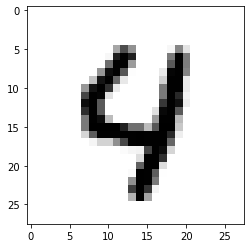

In [976]:
#look through data by changing idx to index through range
idx = 564
show_image(idx, x_data, y_data)

In [ ]:
#script


In [977]:
m,n = np.shape(x)
#m is no of pixels, n is num of data points

Iteration 100
Training accuracy is 46.225%
Test accuracy is 56.89999999999999%
Iteration 200
Training accuracy is 87.075%
Test accuracy is 83.6%
Iteration 300
Training accuracy is 92.375%
Test accuracy is 88.7%
Iteration 400
Training accuracy is 93.85%
Test accuracy is 90.3%
Iteration 500
Training accuracy is 94.5%
Test accuracy is 90.60000000000001%
Iteration 600
Training accuracy is 95.1%
Test accuracy is 90.4%
fini


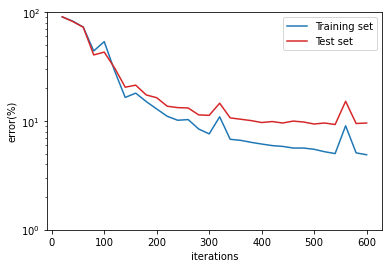

In [980]:
w1, wb1, w2, wb2 = main()

In [981]:
j = 5

prediction is: 5 
with 84.6 percent confidence
digit =  5 



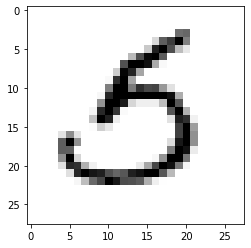

success


In [994]:
test_solution_individual(w1, wb1, w2, wb2, x_data_test, y_data_test , j)
j += 1

In [995]:
indexes = wrong_tally(w1, wb1, w2, wb2, x_data_test, y_data_test)


There are 2 false readings of a 0

There are 6 false readings of a 1

There are 17 false readings of a 2

There are 15 false readings of a 3

There are 4 false readings of a 4

There are 11 false readings of a 5

There are 10 false readings of a 6

There are 6 false readings of a 7

There are 14 false readings of a 8

There are 11 false readings of a 9


In [849]:
i=0

prediction is: 4 
with 44.7 percent confidence
digit =  6 



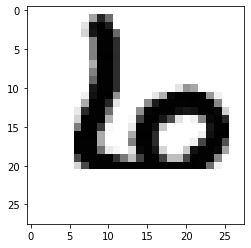

fail


In [1005]:
#call block repeatedly to see all false predictions
test_solution_individual(w1, wb1, w2, wb2, x_data_test, y_data_test , indexes[i])
i+=1